In [1]:
import os, sys, argparse
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import cm
from matplotlib.colors import ListedColormap
import matplotlib.colors as colors
import seaborn as sns

In [2]:
def get_target(df):
    vals = []
    
    for index, row in df.iterrows():
        if row['mean'] <= 2.3:
            vals.append('High')
        elif row['mean'] >= 10:
            vals.append('Low')
        else:
            vals.append('Medium')
            
    new_df = df.copy()
    new_df['reactivity'] = vals

    return new_df

In [3]:
def get_count_df(df, aa_col, cols, vals):
    
    counts = []
    
    for i in range(len(cols)):
        current_col = cols[i]
        current_df = df[df[current_col] == vals[i]]
        counts.append(len(current_df[aa_col].unique()))
        
    return counts

In [4]:
def get_functions(df, aa_col, cols, vals, labels):
    
    subset_df = df[[aa_col] + cols] 
    
    subset_df = subset_df.drop_duplicates()
    
    subset_counts = get_count_df(subset_df, aa_col, cols, vals)
    
    count_df = pd.DataFrame()
    count_df['Function'] = labels
    count_df['Count'] = subset_counts
    
    return count_df

In [9]:
def get_new_bar_plot(df, xcol, ycol, name, colors, sz, ylim):
    
    #create bar chart
    fig = plt.figure(figsize =(8, 6))
    
    sns.barplot(data=df, x=xcol, y=ycol, palette = colors)
    
    plt.xlabel(xcol, size = sz)
    plt.ylabel(ycol, size = sz)
    
    plt.xticks(size = sz, rotation = 45) 
    plt.yticks(size = sz)
    
    plt.ylim(0, ylim)
    
    plt.savefig(name + '_function_barplot.png', dpi = 300, bbox_inches = "tight")
    plt.show()


In [11]:
cd = os.getcwd()
cd

'/Users/lisaboatner/Documents/Documents - Lisa’s MacBook Pro - 1/GitHub/iaa_statistics/residue_functions'

In [13]:
date = '240930'

# 

# Read Cysteine Annotations

In [17]:
c_df = pd.read_csv('https://www.dropbox.com/scl/fi/lw68ilxy97o8qjdnyu0vo/240509_2401_cysteine_annotations.csv?rlkey=u0t3uybu0iv84dp0qpwevl1gi&st=nptqnurn&dl=1')

/var/folders/4c/kr7lv7195d92x2l4kyj4r3z00000gn/T/ipykernel_6004/463603083.py:1: DtypeWarning: Columns (10,12,16,26,27,29,31,53,57,62,64,65) have mixed types. Specify dtype option on import or set low_memory=False.
  c_df = pd.read_csv('https://www.dropbox.com/scl/fi/lw68ilxy97o8qjdnyu0vo/240509_2401_cysteine_annotations.csv?rlkey=u0t3uybu0iv84dp0qpwevl1gi&st=nptqnurn&dl=1')


In [18]:
c_df.head()

,proteinid,cysteineid,pdb,resolved_in_pdb,structureid,freesasa_max,freesasa_avg,freesasa_std,freesasa_vals,sec,...,yang_wang_ligandable,burton_backus_ligandable,castellon_backus_ligandable,acrylamide,bromoacetamide,chloroacetamide,dimethylfumarate,other,phenylpropiolate,ratio_mean
0,A0A087X1C5,A0A087X1C5_C57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A0A087X1C5,A0A087X1C5_C159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A0A087X1C5,A0A087X1C5_C161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A0A087X1C5,A0A087X1C5_C191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A0A087X1C5,A0A087X1C5_C337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 

# Read IsoTOP File

In [25]:
i_df = pd.read_csv('../data/230109_isotop_pdb.csv')

In [27]:
i_df.head()

,identifier,protein,description,peptides,gene,2022_count,2019_count,2010_count,experiment_count,isotop-3_median,...,isotop-20_median,isotop-21_median,isotop-22_median,isotop-23_median,isotop-24_median,mean,sd,Entry,PDB,Classification
0,Q5SRE5_C9,Q5SRE5,Nucleoporin NUP188 homolog,AAAAGGPC*VR,NUP188,13.0,NaN,NaN,13,3.537341,...,NaN,NaN,NaN,NaN,NaN,2.888758,0.777620,Q5SRE5,5IJO;7R5K;,"Chaperone, Transporter, Channel, Receptor"
1,Q9NRL3_C17,Q9NRL3,Striatin-4,AAAAVAAAASSC*RPLGSGAGPGPTGAAPVSAPAPGPGPAGK,STRN4,7.0,NaN,NaN,7,NaN,...,NaN,NaN,NaN,NaN,NaN,4.871786,1.679853,Q9NRL3,NaN,"Scaffolding, Modulator, Adaptor"
2,Q96C19_C172,Q96C19,EF-hand domain-containing protein D2,KAAAGELQEDSGLC*VLAR;AAAGELQEDSGLC*VLAR,EFHD2,13.0,5.0,1.0,19,2.250133,...,NaN,NaN,NaN,NaN,NaN,2.377649,1.301613,Q96C19,5H0P;5I2L;5I2O;5I2Q;,Nucleic Acid and Small Molecule Binding
3,P0DMV8_C17,P0DMV8,Heat shock 70 kDa protein 1A,AAAIGIDLGTTYSC*VGVFQHGK;AAAIGIDLGTTYSC*VGVFQHG...,HSPA1A,13.0,NaN,NaN,13,10.980129,...,NaN,NaN,NaN,NaN,NaN,6.718041,3.760279,P0DMV8,1HJO;1S3X;1XQS;2E88;2E8A;2LMG;3A8Y;3ATU;3ATV;3...,"Chaperone, Transporter, Channel, Receptor"
4,P20810_C408,P20810,Calpastatin,AAAPAPVSEAVC*R,CAST,13.0,NaN,NaN,13,3.719817,...,NaN,NaN,NaN,NaN,NaN,3.621821,0.852873,P20810,NaN,Enzyme


# 

# Merge Annotations 

In [31]:
df = pd.merge(i_df, c_df, left_on = 'identifier', right_on = 'cysteineid', how = 'left')

In [33]:
df.head()

,identifier,protein,description,peptides,gene,2022_count,2019_count,2010_count,experiment_count,isotop-3_median,...,yang_wang_ligandable,burton_backus_ligandable,castellon_backus_ligandable,acrylamide,bromoacetamide,chloroacetamide,dimethylfumarate,other,phenylpropiolate,ratio_mean
0,Q5SRE5_C9,Q5SRE5,Nucleoporin NUP188 homolog,AAAAGGPC*VR,NUP188,13.0,NaN,NaN,13,3.537341,...,NaN,yes,yes,NaN,NaN,yes,NaN,NaN,yes,2.888758
1,Q9NRL3_C17,Q9NRL3,Striatin-4,AAAAVAAAASSC*RPLGSGAGPGPTGAAPVSAPAPGPGPAGK,STRN4,7.0,NaN,NaN,7,NaN,...,NaN,NaN,NaN,yes,NaN,yes,NaN,NaN,NaN,4.871786
2,Q96C19_C172,Q96C19,EF-hand domain-containing protein D2,KAAAGELQEDSGLC*VLAR;AAAGELQEDSGLC*VLAR,EFHD2,13.0,5.0,1.0,19,2.250133,...,NaN,yes,NaN,yes,NaN,yes,NaN,yes,NaN,2.377649
3,P0DMV8_C17,P0DMV8,Heat shock 70 kDa protein 1A,AAAIGIDLGTTYSC*VGVFQHGK;AAAIGIDLGTTYSC*VGVFQHG...,HSPA1A,13.0,NaN,NaN,13,10.980129,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.718041
4,P20810_C408,P20810,Calpastatin,AAAPAPVSEAVC*R,CAST,13.0,NaN,NaN,13,3.719817,...,NaN,yes,NaN,yes,NaN,yes,NaN,NaN,NaN,3.621821


In [35]:
df = df.drop(columns = ['Classification_x'])

In [37]:
df = df.rename(columns = {'Classification_y': 'Classification'})

In [39]:
df.columns.to_list()

['identifier',
 'protein',
 'description',
 'peptides',
 'gene',
 '2022_count',
 '2019_count',
 '2010_count',
 'experiment_count',
 'isotop-3_median',
 'isotop-11_median',
 'isotop-6_median',
 'isotop-5_median',
 'isotop-12_median',
 'isotop-9_median',
 'isotop-7_median',
 'isotop-10_median',
 'isotop-2_median',
 'isotop-1_median',
 'isotop-13_median',
 'isotop-8_median',
 'isotop-4_median',
 'isotop-14_median',
 'isotop-15_median',
 'isotop-16_median',
 'isotop-17_median',
 'isotop-18_median',
 'isotop-19_median',
 'isotop-20_median',
 'isotop-21_median',
 'isotop-22_median',
 'isotop-23_median',
 'isotop-24_median',
 'mean',
 'sd',
 'Entry',
 'PDB',
 'proteinid',
 'cysteineid',
 'pdb',
 'resolved_in_pdb',
 'structureid',
 'freesasa_max',
 'freesasa_avg',
 'freesasa_std',
 'freesasa_vals',
 'sec',
 'disordered',
 'disulfide',
 'redox',
 'zinc_finger',
 'zinc_binding',
 'metal_binding',
 'active_region',
 'binding_region',
 'is_as',
 'near_as_1D',
 'near_as_neighbors',
 'as_category',


In [41]:
df['zinc_binding'].value_counts()

zinc_binding
yes    73
Name: count, dtype: int64

In [43]:
no_function_df = df[(df['active_region'] != 'yes') & (df['binding_region'] != 'yes') & (df['metal_binding'] != 'yes') & (df['disordered'] != 'yes') & (df['disulfide'] != 'yes') & (df['redox'] != 'yes')]
no_function_df[['identifier', 'active_region', 'binding_region', 'metal_binding', 'disordered', 'disulfide', 'redox']]

,identifier,active_region,binding_region,metal_binding,disordered,disulfide,redox
0,Q5SRE5_C9,NaN,NaN,NaN,NaN,NaN,NaN
1,Q9NRL3_C17,NaN,NaN,NaN,NaN,NaN,NaN
2,Q96C19_C172,NaN,NaN,NaN,NaN,NaN,NaN
3,P0DMV8_C17,NaN,NaN,NaN,NaN,NaN,NaN
4,P20810_C408,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
9778,Q9UMR2_C393,NaN,NaN,NaN,NaN,NaN,NaN
9779,Q9Y365_C74,NaN,NaN,NaN,NaN,NaN,NaN
9780,Q9Y365_C75,NaN,NaN,NaN,NaN,NaN,NaN
9781,Q9Y3F4_C340,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
no_function_ids = list(no_function_df['identifier'].unique())

In [47]:
df['unknown'] = np.where(df['identifier'].isin(no_function_ids), 'yes', None)

# Subset by Ratio 

In [50]:
h_df = df[df['mean'] <= 2.3]
l_df = df[df['mean'] >= 10]

# Get Function Counts

In [53]:
function_cols = ['active_region', 'binding_region', 'metal_binding', 'disordered', 'disulfide', 'redox', 'unknown']
function_labels = ['Active Site', 'Binding Site', 'Metal Binding', 'Disorder', 'Disulfide', 'Redox', 'Other']
function_vals = ['yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes']

In [55]:
h_function_df = get_functions(h_df, 'identifier', function_cols, function_vals, function_labels)
h_function_df

,Function,Count
0,Active Site,43
1,Binding Site,9
2,Metal Binding,8
3,Disorder,10
4,Disulfide,41
5,Redox,27
6,Other,728


In [61]:
l_function_df = get_functions(l_df, 'identifier', function_cols, function_vals, function_labels)
l_function_df

,Function,Count
0,Active Site,4
1,Binding Site,3
2,Metal Binding,14
3,Disorder,14
4,Disulfide,3
5,Redox,1
6,Other,958


# Get Function Counts by Group

In [64]:
h_function_df['Reactivity'] = 'High'
l_function_df['Reactivity'] = 'Low'

In [66]:
together_function_df = pd.concat([h_function_df, l_function_df])

# 

# Zinc, Zing Fingers, Metal Binding 

In [80]:
df = get_target(df)
df = df[df['reactivity'] != 'Medium']

In [82]:
df.groupby('reactivity')['metal_binding'].value_counts()

reactivity  metal_binding
High        yes               8
Low         yes              14
Name: count, dtype: int64

In [84]:
df.groupby('reactivity')['zinc_binding'].value_counts()

reactivity  zinc_binding
High        yes              4
Low         yes             13
Name: count, dtype: int64

In [86]:
df.groupby('reactivity')['zinc_finger'].value_counts()

reactivity  zinc_finger
High        yes            18
Low         yes            26
Name: count, dtype: int64

In [90]:
metal_new_df = pd.DataFrame()
metal_new_df['Reactivity'] = ['High', 'High', 'High', 'Low', 'Low', 'Low']
metal_new_df['Category'] = ['Metal\nBinding', 'Zinc\nBinding', 'Zinc\nFinger', 'Metal\nBinding', 'Zinc\nBinding', 'Zinc\nFinger']
metal_new_df['Count'] = [8, 4, 18, 14, 13, 26]

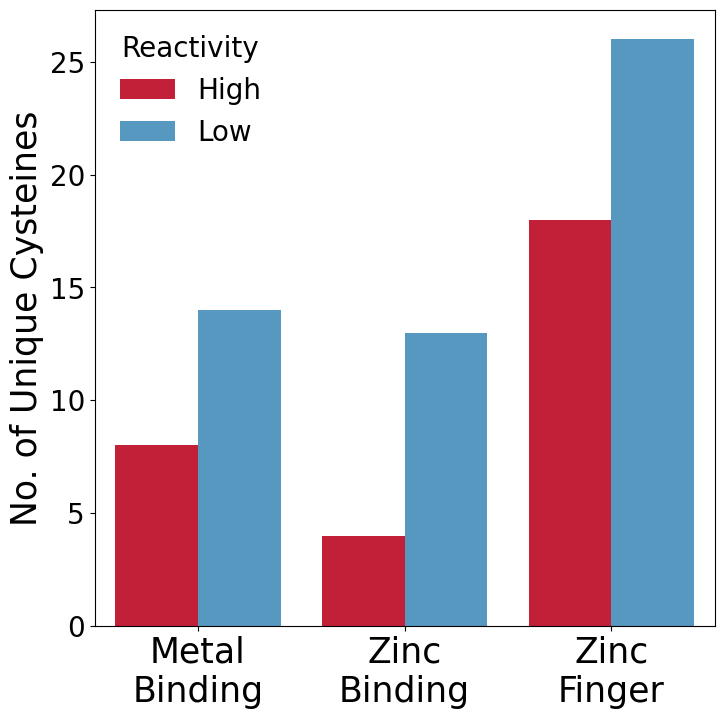

In [92]:
#create bar chart
fig = plt.figure(figsize =(8, 8))

sns.barplot(data=metal_new_df, x='Category', y='Count', palette = ['#dd0426', '#449dd1'], hue = 'Reactivity')

plt.ylabel('No. of Unique Cysteines', size = 25)
plt.xlabel('', size = 20)

plt.yticks(size = 20) 
plt.xticks(size = 25)

#     plt.ylim(0, ylim)

plt.legend(frameon = False, loc = 'upper left', fontsize = 20, title = 'Reactivity', title_fontsize = 20)
#     plt.legend(title = 'Reactivity', labels=['High', 'Low'], frameon = False, loc = 'upper right', fontsize = 15, title_fontsize = 15)

plt.savefig(date + '_grouped_function_metal_modified_barplot.png', dpi = 300, bbox_inches = "tight")
plt.show()


